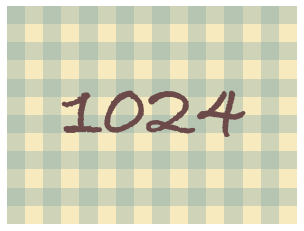

In [33]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors

# 将16进制的颜色转换成 RGB 形式的三维数组
def hex2rgb(hx):  
    return np.array(mcolors.to_rgb(hx))


height, width = 60, 80  # 设置矩阵大小
alpha = 0.35            # 透明度
stride = 5              # 条纹之间的间隔
width = 5               # 条纹宽度
bg = np.ones((height, width, 3)) * hex2rgb("#F6EABE") # 背景颜色
rgb_color_fg = hex2rgb("#87AAAA")  # 格纹颜色矩阵

# Vertical
for i, loc in enumerate(range(0, bg.shape[1], stride)):
    if i % 2 == 0:
        for _shift in range(width):
            _loc = loc + _shift
            bg[:, _loc, :] *= (1 - alpha)
            bg[:, _loc, :] += rgb_color_fg * alpha

# Horizontal 
for i, loc in enumerate(range(0, bg.shape[0], stride)):
    if i % 2 == 0:
        for _shift in range(width):
            _loc = loc + _shift
            bg[_loc, :, :] *= (1 - alpha)
            bg[_loc, :, :] += rgb_color_fg * alpha
            
fig, ax = plt.subplots()
ax.set_axis_off()  # 去掉边框
ax.imshow(bg)      # 画图
plt.rcParams['font.family'] = "Bradley Hand"           # 设置字体
ax.text(width / 2, height / 2 + 4, "1024",             # 加上“1024”
        ha="center", fontsize=80, color="#6C4A4A")
fig.savefig("1024.png", bbox_inches="tight", dpi=200)  # 保存图片

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors

In [2]:
# 设置全局字体
plt.rcParams['font.family'] = "Bradley Hand"

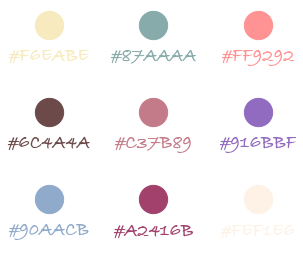

In [26]:
def view_colors(colors, n_cols=3, txt_offset=0.4, 
                margin=0.2, fname=None):
    """  pre-view colors
    """
    figsize = (n_cols * 1.5, len(colors) / n_cols * 1.5)
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_axis_off()
    for i, hex_str in enumerate(colors):
        x, y = i % n_cols, - (i // n_cols)
        ax.scatter(x, y, color=hex_str, s=800)
        ax.text(x, y - txt_offset, str(hex_str), ha="center", color=hex_str,
                fontsize=18)
    ax.set_ylim(y - txt_offset - margin, margin)
    ax.set_xlim(-margin, (n_cols - 1) + margin)
    if fname is not None:
        ax.figure.savefig(fname, bbox_inches="tight", dpi=200)
    return ax

hex_strings = ["#F6EABE", "#87AAAA", "#FF9292", 
               "#6C4A4A", "#C37B89", "#916BBF", 
               "#90AACB", "#A2416B", "#FEF1E6"]

ax = view_colors(hex_strings)
ax.figure.savefig("colors.png", bbox_inches="tight", dpi=200)
ax.figure.savefig("colors.pdf", bbox_inches="tight", dpi=200)

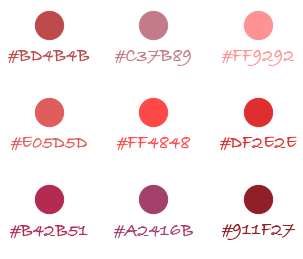

In [4]:
hex_strings = ["#BD4B4B", "#C37B89", "#FF9292", 
               "#E05D5D", "#FF4848", "#DF2E2E", 
               "#B42B51", "#A2416B", "#911F27"]

ax = view_colors(hex_strings)
ax.figure.savefig("red_colors.png", bbox_inches="tight", dpi=200)
ax.figure.savefig("red_colors.pdf", bbox_inches="tight", dpi=200)

In [5]:
# 将16进制的颜色转换成 RGB 形式的三维数组
def hex2rgb(hx):
    """returns a RGB array of length 3"""
    return np.array(mcolors.to_rgb(hx))

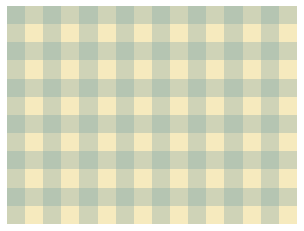

In [7]:
# 设置矩阵大小
height, width = 60, 80

bg = np.ones((height, width, 3)) * hex2rgb("#F6EABE") # 背景颜色
rgb_color_fg = hex2rgb("#87AAAA")  # 格纹颜色
alpha = 0.35  # 透明度

# Vertical
end_id = bg.shape[1]
stride = 5
for i, loc in enumerate(range(0, end_id, stride)):
    if i % 2 == 0:
        for _shift in range(stride):
            _loc = loc + _shift
            bg[:, _loc, :] *= (1 - alpha)
            bg[:, _loc, :] += rgb_color_fg * alpha


# Horizontal 
end_id = bg.shape[0]
stride = 5
for i, loc in enumerate(range(0, end_id, stride)):
    if i % 2 == 0:
        for _shift in range(stride):
            _loc = loc + _shift
            bg[_loc, :, :] *= (1 - alpha)
            bg[_loc, :, :] += rgb_color_fg * alpha
            

fig, ax = plt.subplots()
ax.imshow(bg)
ax.set_axis_off()

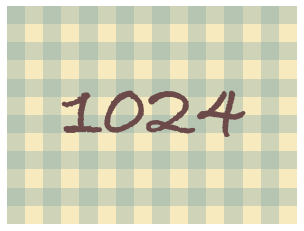

In [8]:
# 加几个字
# plt.rcParams['font.family'] = "Bradley Hand"
ax.text(width / 2, height / 2 + 4, "1024", ha="center", fontsize=80, color="#6C4A4A")
fig

## 函数打包

In [9]:
def add_vertical_stripes(arr: np.ndarray, color, stride=5, width=None, offset=1, alpha=0.35,):
    """ Add vertical stripes to the given background (`arr`)
    better set `stride` much smaller than ``arr.shape[1] // 2``.
    
    color: RGB array of length 3.
    width: int. width of the strips.
    """
    arr = arr[:, offset:, :]
    end_id = arr.shape[1]
    width = stride if width is None else width
    for i, loc in enumerate(range(0, end_id, stride)):
        if i % 2 == 0:
            for _shift in range(width):
                _loc = loc + _shift
                if _loc >= end_id:
                    break
                arr[:, _loc, :] *= (1 - alpha)
                arr[:, _loc, :] += color * alpha


def add_horizontal_stripes(arr: np.ndarray, color, width=None, stride=5, offset=1, alpha=0.35):
    """ Add horizontal stripes to the given background (`arr`)
    better set `stride` much smaller than ``arr.shape[0] // 2``.
    
    color: RGB array of length 3.
    width: int. width of the strips.
    """
    arr = arr[offset:, :, :]
    end_id = arr.shape[0]
    width = stride if width is None else width

    for i, loc in enumerate(range(0, end_id, stride)):
        if i % 2 == 0:
            for _shift in range(width):
                _loc = loc + _shift
                if _loc >= end_id:
                    break
                arr[_loc, :, :] *= (1 - alpha)
                arr[_loc, :, :] += color * alpha


def image_show(arr, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    ax.imshow(arr)
    ax.set_axis_off()
    return ax

## 定制条纹分布的区域

Text(40.0, 34.0, '1024')

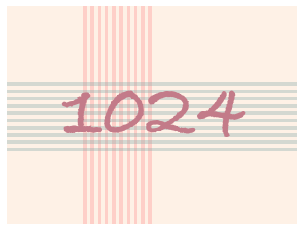

In [10]:
height, width = 60, 80
bg = np.ones((height, width, 3)) * hex2rgb("#FEF1E6")

add_vertical_stripes(bg[:, 20: 40, :], color=hex2rgb("#FF9292"), stride=1)
add_horizontal_stripes(bg[20: 40, :, :], color=hex2rgb("#87AAAA"), stride=1)

ax = image_show(bg)
ax.text(width / 2, height / 2 + 4, "1024", ha="center", fontsize=80, color="#C37B89")

## 组合一下

Text(40.0, 34.0, '1024')

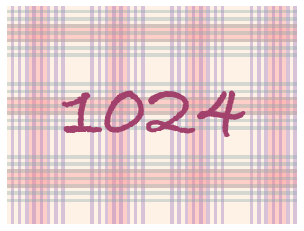

In [11]:
def add_vertical_stripe_groups(
        arr: np.ndarray, color, 
        stride=10, width=None, offset=1,
        sub_stride=1, sub_width=None, alpha=0.35,
):
    """ Add vertical stripes to the given background (`arr`)
    better set `stride` much smaller than ``arr.shape[1] // 2``.
    
    color: RGB array of length 3.
    sub_width: int. width of the strips.
    """
    arr = arr[:, offset:, :]
    end_id = arr.shape[1]
    width = stride if width is None else width
    for i, loc in enumerate(range(0, end_id, stride)):
        if i % 2 == 0:
            add_vertical_stripes(
                arr[:, loc: loc + width, :], color, 
                width=sub_width, stride=sub_stride, 
                alpha=alpha, offset=0)
        
def add_horizontal_stripe_groups(
        arr: np.ndarray, color, 
        stride=10, width=None, offset=1,
        sub_stride=1, sub_width=None, alpha=0.35,
):
    """ Add vertical stripes to the given background (`arr`)
    better set `stride` much smaller than ``arr.shape[1] // 2``.
    
    color: RGB array of length 3.
    sub_width: int. width of the strips.
    """
    arr = arr[offset:, :, :]
    end_id = arr.shape[1]
    width = stride if width is None else width
    for i, loc in enumerate(range(0, end_id, stride)):
        if i % 2 == 0:
            add_horizontal_stripes(
                arr[loc: loc + width, :, :], color, 
                width=sub_width, stride=sub_stride, 
                alpha=alpha, offset=0)
        

height, width = 60, 80
bg = np.ones((height, width, 3)) * hex2rgb("#FEF1E6")

v_stride = 11
add_vertical_stripes(bg, color=hex2rgb("#FF9292"), stride=v_stride, width=5, offset=6)
add_vertical_stripe_groups(bg, hex2rgb("#916BBF"), stride=v_stride, width=15)
h_stride = 10
add_horizontal_stripes(bg, color=hex2rgb("#FF9292"), stride=h_stride, width=5, offset=5)
add_horizontal_stripe_groups(bg, hex2rgb("#87AAAA"), stride=h_stride, width=13)
ax = image_show(bg)

ax.text(width / 2, height / 2 + 4, "1024", ha="center", fontsize=80, color="#A2416B")

In [12]:
ax.figure.savefig("happy1024.png", bbox_inches="tight", dpi=200)
ax.figure.savefig("happy1024.pdf", bbox_inches="tight", dpi=200)

## DIY

In [13]:
def simple_grids(bg_color="#F6EABE", 
                 fg_color="#87AAAA", 
                 txt_color="#6C4A4A",
                 stride=5, offset=2, 
                 h=80, w=80, fontsize=60, 
                 ax=None, fname=None, **kwds):
    bg = np.ones((h, w, 3)) * hex2rgb(bg_color) # 背景颜色
    rgb_color_fg = hex2rgb(fg_color)  # 格纹颜色
    add_vertical_stripes(bg, color=rgb_color_fg, stride=stride, offset=offset, **kwds)
    add_horizontal_stripes(bg, color=rgb_color_fg, stride=stride, offset=offset, **kwds)

    ax = image_show(bg, ax=ax)
    ax.text(w / 2, h / 2 + 4, "1024", ha="center", fontsize=fontsize, color=txt_color)
    if fname is not None:
        ax.figure.savefig(fname, bbox_inches="tight", dpi=200)
    return ax


def simple_cross(bg_color="#FEF1E6", 
                 v_color="#FF9292", 
                 h_color="#87AAAA", 
                 txt_color="#6C4A4A",
                 stride=1,
                 h=80, w=80, fontsize=60, 
                 ax=None, fname=None, **kwds):
    bg = np.ones((h, w, 3)) * hex2rgb(bg_color)
    add_vertical_stripes(bg[:, w // 6: w // 6 * 3, :], 
                         color=hex2rgb(v_color), stride=stride, **kwds)
    add_horizontal_stripes(bg[h // 3: h // 3 * 2, :, :], 
                           color=hex2rgb(h_color), stride=stride, **kwds)
    ax = image_show(bg, ax=ax)
    ax.text(w / 2, h / 2 + 4, "1024", ha="center", fontsize=fontsize, color=txt_color)
    if fname is not None:
        ax.figure.savefig(fname, bbox_inches="tight", dpi=200)
    return ax


def pattern1(bg_color="#FEF1E6", 
             v_color="#FF9292", v_group_color="#916BBF",
             h_color="#FF9292", h_group_color="#87AAAA",
             alpha=0.35,
             txt_color="#A2416B",
             h=80, w=80, fontsize=60, 
             ax=None, fname=None,):
    bg = np.ones((h, w, 3)) * hex2rgb(bg_color)
    v_stride = 11
    add_vertical_stripes(bg, color=hex2rgb(v_color), stride=v_stride, width=5, offset=6)
    add_vertical_stripe_groups(bg, hex2rgb(v_group_color), stride=v_stride, width=15, alpha=alpha)
    h_stride = 10
    add_horizontal_stripes(bg, color=hex2rgb(h_color), stride=h_stride, width=5, offset=5)
    add_horizontal_stripe_groups(bg, hex2rgb(h_group_color), stride=h_stride, width=13, alpha=alpha)
    ax = image_show(bg)
    ax.text(w / 2, h / 2 + 4, "1024", ha="center", fontsize=fontsize, color=txt_color)
    if fname is not None:
        ax.figure.savefig(fname, bbox_inches="tight", dpi=200)
    return ax
    
    
def pattern2(bg_color="#FEF1E6", 
             v_color="#FF9292", v_group_color="#916BBF",
             h_color="#FF9292", h_group_color="#916BBF",
             txt_color="#A2416B",
             h=80, w=80, fontsize=60, ax=None,
             fname=None,
             ):
    bg = np.ones((h, w, 3)) * hex2rgb(bg_color)
    v_stride = 11
    add_vertical_stripes(bg, color=hex2rgb(v_color), stride=v_stride, width=15, alpha=0.2)
    add_vertical_stripe_groups(bg, hex2rgb(v_group_color), stride=v_stride, width=5, offset=6, alpha=0.3)
    h_stride = 10
    add_horizontal_stripes(bg, color=hex2rgb(h_color), stride=h_stride, width=15, alpha=0.2)
    add_horizontal_stripe_groups(bg, hex2rgb(h_group_color), stride=h_stride, width=5, offset=6, alpha=0.3)
    ax = image_show(bg)
    ax.text(w / 2, h / 2 + 4, "1024", ha="center", fontsize=fontsize, color=txt_color)
    if fname is not None:
        ax.figure.savefig(fname, bbox_inches="tight", dpi=200)
    return ax



<AxesSubplot:>

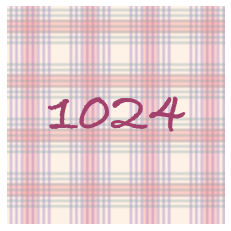

In [14]:
pattern1(fname="main1.png")

<AxesSubplot:>

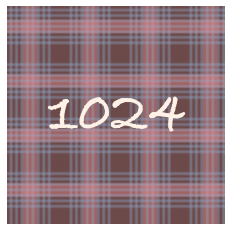

In [15]:
pattern1("#6C4A4A", 
         v_color="#FF9292", v_group_color="#90AACB",
         h_color="#FF9292", h_group_color="#90AACB",
         txt_color="#FEF1E6", alpha=0.4,
         fname="main2.png"
         )

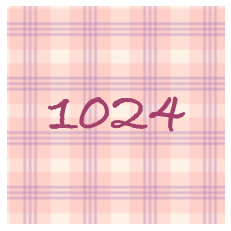

In [16]:
ax = pattern2(fname="main3.png")

<AxesSubplot:>

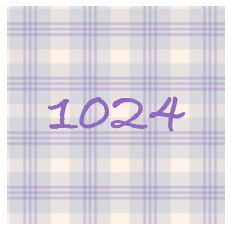

In [17]:
pattern2(v_color="#90AACB", h_color="#90AACB", txt_color="#916BBF", fname="main4.png")

<AxesSubplot:>

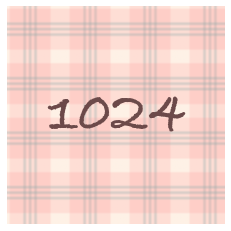

In [18]:
pattern2(h_group_color="#87AAAA", v_group_color="#87AAAA", txt_color="#6C4A4A", fname="main5.png")

<AxesSubplot:>

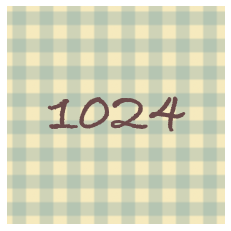

In [19]:
simple_grids(fname="main6.png")

<AxesSubplot:>

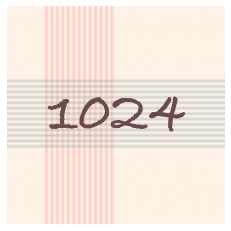

In [20]:
simple_cross(fname="main7.png")

<AxesSubplot:>

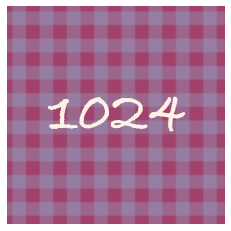

In [21]:
simple_grids("#A2416B", "#90AACB", "#FEF1E6", fname="main8.png")

<AxesSubplot:>

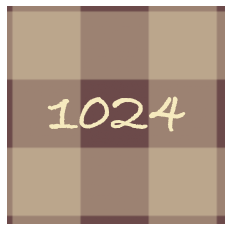

In [32]:
simple_grids("#6C4A4A", "#F6EABE", "#F6EABE", stride=25, offset=2, fname="main9.png")

<AxesSubplot:>

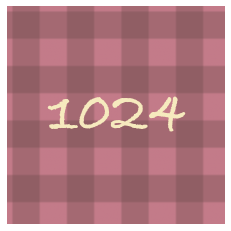

In [23]:
# simple_grids("#C37B89", "#6C4A4A", "black", stride=10, alpha=0.5)
simple_grids("#C37B89", "#6C4A4A", "#F6EABE", stride=10, alpha=0.35, fname="main11.png")

<AxesSubplot:>

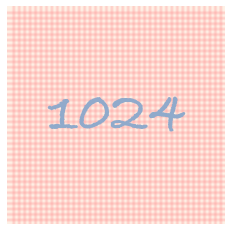

In [24]:
simple_grids("#FEF1E6", "#FF9292", "#90AACB", stride=1, fname="main11.png")
# simple_grids("#FEF1E6", "#FF9292", "#916BBF", stride=1)

<AxesSubplot:>

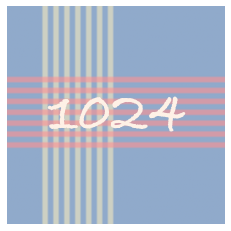

In [25]:
simple_cross(bg_color="#90AACB", 
             v_color="#F6EABE", 
             h_color="#FF9292", 
             txt_color="#FEF1E6", 
             stride=2, offset=0, alpha=0.6, fname="main12.png")